In [22]:
import pandas as pd 
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt  
import os

In [23]:
#set column names

column_names = ['ID', 'State', 'Location', 'Year Completed', 'Primary Funding Source', 'Justification', 'Length (ft)', 'Volume (CY)', 'Total Cost',	'Year Completed CPI', 'Adjusted Cost (2022)', 'Total Cost/CY', 'Adjusted Cost/CY', 'CY/Foot', 'Current CPI', 'Other Info', 'Source Comment']

beach = pd.read_excel('data/beach_nourishment_PSDS.xlsx', names = column_names, header=0)
#drop the first column called 'ID'
beach.drop(['ID', 'Year Completed CPI', 'Current CPI', 'Other Info', 'Source Comment'], axis=1, inplace=True)

#List of columns to convert to millions and round

columns_to_convert = ['Total Cost', 'Adjusted Cost (2022)', 'Adjusted Cost/CY', 'Total Cost/CY']

# Convert and round each specified column
for column in columns_to_convert:
    beach[column] = (beach[column] / 1e6).round(2)
   
#add thousands comma to cubic yard measurement
beach['Volume (CY)'] = beach['Volume (CY)'].apply(lambda x: f'{x:,.0f}')
    
print(beach)

     State                              Location  Year Completed  \
0       AL                       Sand Island Bar            1987   
1       AL                           Perdido Key            1986   
2       AL                       Sand Island Bar            1988   
3       AL                           Gulf Shores            2001   
4       AL                       Sand Island Bar            1988   
...    ...                                   ...             ...   
2454    CA    Goleta Beach, Santa Barbara County            2017   
2455    CA    Goleta Beach, Santa Barbara County            2010   
2456    CA          Newport Beach, Orange County            2009   
2457    CA  Surfside/Sunset Beach, Orange County            2009   
2458    CA            Morro Bay, San Luis Obispo            2017   

     Primary Funding Source     Justification  Length (ft) Volume (CY)  \
0                   Federal     Demonstration         6000     464,000   
1                   Federal        

In [24]:
beach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459 entries, 0 to 2458
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2459 non-null   object 
 1   Location                2459 non-null   object 
 2   Year Completed          2459 non-null   int64  
 3   Primary Funding Source  2457 non-null   object 
 4   Justification           2459 non-null   object 
 5   Length (ft)             2459 non-null   int64  
 6   Volume (CY)             2459 non-null   object 
 7   Total Cost              2459 non-null   float64
 8   Adjusted Cost (2022)    2459 non-null   float64
 9   Total Cost/CY           2459 non-null   float64
 10  Adjusted Cost/CY        2459 non-null   float64
 11  CY/Foot                 2459 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 230.7+ KB


In [25]:
beach.describe()

,Year Completed,Length (ft),Total Cost,Adjusted Cost (2022),Total Cost/CY,Adjusted Cost/CY,CY/Foot
count,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2.459000e+03
mean,1990.987393,7022.884913,4.083473,6.277361,0.104542,0.204612,2.139504e+05
std,20.741685,12700.530217,12.790591,16.352338,1.228524,2.296156,9.670660e+05
min,1923.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1975.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2.954500e+01
50%,1995.000000,2333.000000,0.210000,0.870000,0.000000,0.000000,9.933000e+01
75%,2007.000000,8448.000000,2.895000,6.130000,0.000000,0.000000,9.700000e+04
max,2024.000000,141000.000000,220.000000,286.200000,43.510000,61.530000,2.600930e+07


Histogram


array([[<Axes: title={'center': 'Year Completed'}>,
        <Axes: title={'center': 'Length (ft)'}>,
        <Axes: title={'center': 'Total Cost'}>],
       [<Axes: title={'center': 'Adjusted Cost (2022)'}>,
        <Axes: title={'center': 'Total Cost/CY'}>,
        <Axes: title={'center': 'Adjusted Cost/CY'}>],
       [<Axes: title={'center': 'CY/Foot'}>, <Axes: >, <Axes: >]],
      dtype=object)

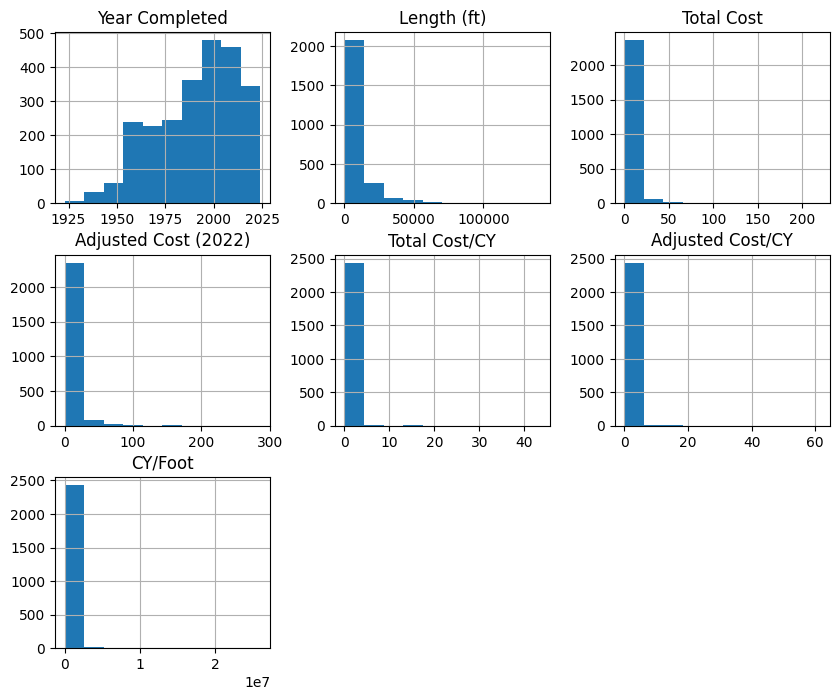

In [26]:
beach.hist(figsize=(10,8))

<Axes: >

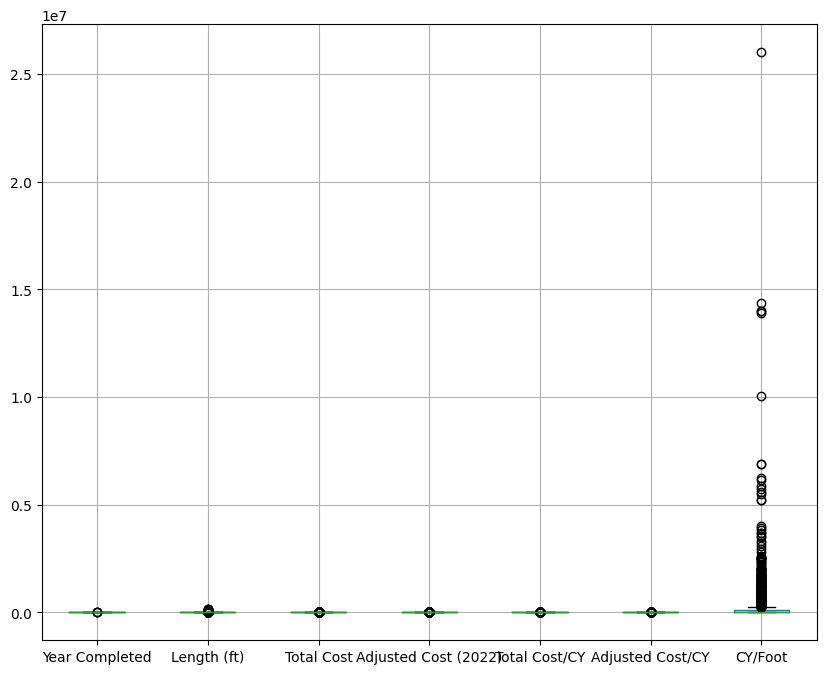

In [27]:
#box plot
beach.boxplot(figsize=(10, 8))

In [28]:
print(beach.isnull().sum())

State                     0
Location                  0
Year Completed            0
Primary Funding Source    2
Justification             0
Length (ft)               0
Volume (CY)               0
Total Cost                0
Adjusted Cost (2022)      0
Total Cost/CY             0
Adjusted Cost/CY          0
CY/Foot                   0
dtype: int64


In [29]:
group_just = beach.groupby(['Justification'])
just_counts = group_just.size().reset_index(name='Counts')
print(just_counts)

                Justification  Counts
0                      Bypass       2
1               Demonstration       4
2       Ecosystem Restoration      47
3                   Emergency     263
4              Emergency Dune      30
5   Environmental Restoration       4
6              FEMA Emergency      27
7                       MsCIP       3
8                  Navigation     581
9                 Restoration      20
10                Section 111      26
11           Shore Protection     777
12                    Unknown     675


In [30]:
group_funding = beach.groupby(['Primary Funding Source'])
fund_counts = group_funding.size().reset_index(name='Counts')
print(fund_counts)

  Primary Funding Source  Counts
0                Federal    1451
1                  Local     241
2                  Other       1
3                Private      45
4                  State     366
5                Unknown     353


In [31]:
length_by_year = beach.groupby('Year Completed').agg({'Length (ft)': 'sum', 'Volume (CY)': 'sum', 'Adjusted Cost (2022)': 'sum' })
print(length_by_year)



                Length (ft)  \
Year Completed                
1923                   8750   
1926                   2500   
1927                   1056   
1930                      0   
1933                      0   
...                     ...   
2020                 531236   
2021                 446650   
2022                 474984   
2023                 180167   
2024                  15239   

                                                      Volume (CY)  \
Year Completed                                                      
1923                                                    1,700,000   
1926                                                      850,000   
1927                                                      500,000   
1930                                                   05,200,000   
1933                                                      606,000   
...                                                           ...   
2020            6,000,000242,912939,0002,022

In [32]:
grouped_data = beach.groupby(['State', 'Justification'])
counts = grouped_data.size().reset_index(name='Counts')
print(counts)

    State          Justification  Counts
0      AL          Demonstration       3
1      AL  Ecosystem Restoration       1
2      AL              Emergency       5
3      AL         FEMA Emergency       1
4      AL             Navigation       2
..    ...                    ...     ...
99     VA       Shore Protection      58
100    VA                Unknown      11
101    WA             Navigation       1
102    WA       Shore Protection       3
103    WA                Unknown       9

[104 rows x 3 columns]


In [33]:
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return a boolean Series where True means the value is NOT an outlier
    return column.between(lower_bound, upper_bound, inclusive='both')

# Automatically select numeric columns to check
columns_to_check = beach.select_dtypes(include=[np.number]).columns
# Apply the outlier detection function to each specified column and store the result
mask = pd.concat([identify_outliers(beach[col]) for col in columns_to_check], axis=1).all(axis=1)

# Filter the DataFrame to only include rows where all specified columns are NOT outliers
df_filtered = beach[mask]

print(df_filtered)

     State                            Location  Year Completed  \
0       AL                     Sand Island Bar            1987   
2       AL                     Sand Island Bar            1988   
3       AL                         Gulf Shores            2001   
4       AL                     Sand Island Bar            1988   
5       AL                      Dauphin Island            2000   
...    ...                                 ...             ...   
2450    CA           Cardiff, San Diego County            2021   
2451    CA  Goleta Beach, Santa Barbara County            2018   
2454    CA  Goleta Beach, Santa Barbara County            2017   
2455    CA  Goleta Beach, Santa Barbara County            2010   
2456    CA        Newport Beach, Orange County            2009   

     Primary Funding Source          Justification  Length (ft) Volume (CY)  \
0                   Federal          Demonstration         6000     464,000   
2                   Federal          Demonstratio

In [34]:
df_filtered.to_excel('data/beach_filtered_data.xlsx', sheet_name='Beach Filtered Data', index=False)

In [35]:
clean_beach_data = df_filtered.copy()

In [36]:
print(clean_beach_data)

     State                            Location  Year Completed  \
0       AL                     Sand Island Bar            1987   
2       AL                     Sand Island Bar            1988   
3       AL                         Gulf Shores            2001   
4       AL                     Sand Island Bar            1988   
5       AL                      Dauphin Island            2000   
...    ...                                 ...             ...   
2450    CA           Cardiff, San Diego County            2021   
2451    CA  Goleta Beach, Santa Barbara County            2018   
2454    CA  Goleta Beach, Santa Barbara County            2017   
2455    CA  Goleta Beach, Santa Barbara County            2010   
2456    CA        Newport Beach, Orange County            2009   

     Primary Funding Source          Justification  Length (ft) Volume (CY)  \
0                   Federal          Demonstration         6000     464,000   
2                   Federal          Demonstratio

In [37]:
group_by_state = clean_beach_data.groupby('State')

count_per_state = group_by_state.size()
print(count_per_state)


State
AL      8
CA    191
CT     34
DE    103
FL    443
GA      6
LA      7
MA     49
MD     25
ME     18
MS     13
NC    189
NH      6
NJ    206
NY     71
RI     13
SC     57
TX     47
VA     60
WA     11
dtype: int64


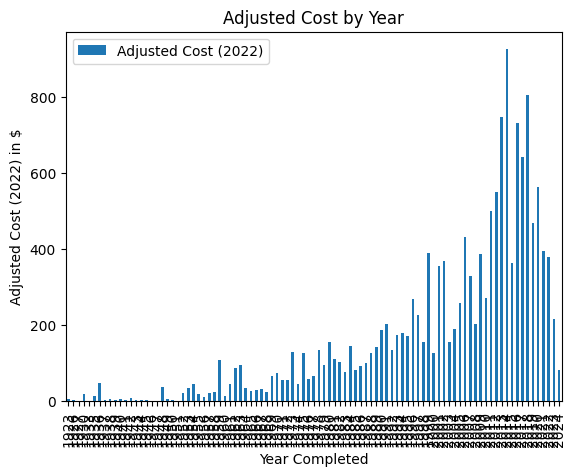

In [38]:
totals_by_year = beach.groupby('Year Completed').agg({'Adjusted Cost (2022)': 'sum' })
totals_by_year = totals_by_year.reset_index()
#plot
totals_by_year.plot(x='Year Completed', y= 'Adjusted Cost (2022)', kind='bar')
plt.title('Adjusted Cost by Year')
plt.xlabel('Year Completed')
plt.ylabel('Adjusted Cost (2022) in $')
plt.show() 

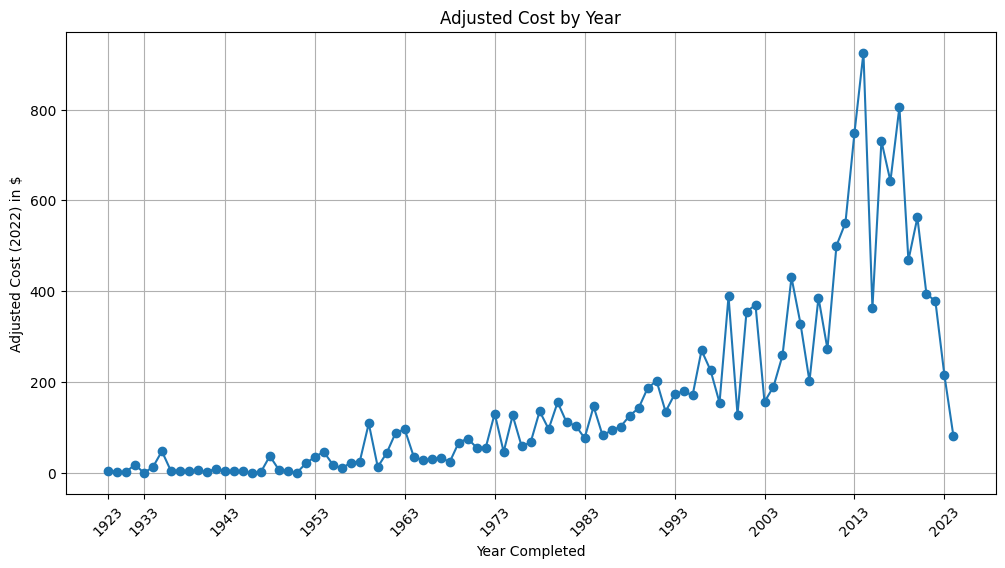

In [39]:

# Convert the 'Year Completed' column to string if it's not already, to ensure consistent tick labeling
totals_by_year['Year Completed'] = totals_by_year['Year Completed'].astype(str)

# Plotting as a line chart
plt.figure(figsize=(12, 6))  # Optional: Adjusts the size of your chart
plt.plot(totals_by_year['Year Completed'], totals_by_year['Adjusted Cost (2022)'], marker='o', linestyle='-')

# Adding title and labels
plt.title('Adjusted Cost by Year')
plt.xlabel('Year Completed')
plt.ylabel('Adjusted Cost (2022) in $')

# Handling x-axis ticks for every 10 years
# Assuming 'Year Completed' are sorted and are in YYYY format
start_year = int(totals_by_year['Year Completed'].iloc[0])
end_year = int(totals_by_year['Year Completed'].iloc[-1])
tick_years = [str(year) for year in range(start_year, end_year + 1, 10)]  # Generate a list of years for ticks
plt.xticks(ticks=tick_years, labels=tick_years, rotation=45)  # Set ticks; rotation for readability

# add grid lines to make the chart easier to read
plt.grid(True)

# Show plot
plt.show()
